<a href="https://colab.research.google.com/github/akemiyamashita/Trainable_Segmentation/blob/master/FHRfeaturetool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandas --upgrade

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.24.0)


In [0]:
import pandas as pd
pd.__version__

'0.22.0'

In [0]:
import pandas as pd
#import autosklearn.classification
import featuretools as ft
from featuretools.primitives import *
from featuretools.variable_types import Numeric
import featuretools as ft
from featuretools.primitives import CumMean, Percentile
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
import os

In [0]:
dataset_df=pd.read_csv('train.csv')


In [0]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 33 columns):
ID               3825 non-null object
CCT              3825 non-null int64
sex              3825 non-null int64
DM               3825 non-null int64
HyperTension     3825 non-null int64
dislipidemia     3825 non-null int64
age              3825 non-null int64
ECG              3825 non-null int64
smoking          3825 non-null int64
alcohol          3825 non-null int64
BP max           3825 non-null int64
BP min           3825 non-null int64
CREA             3825 non-null float64
eGFR             3825 non-null float64
total_Cho        3825 non-null int64
HDL-Cho          3825 non-null int64
LDL-Cho          3825 non-null int64
LDL/HDL          3825 non-null float64
HbA1c(NGSP)      3825 non-null float64
heart desease    3825 non-null int64
body pain        3825 non-null int64
lung             3825 non-null int64
brain            3825 non-null int64
kidney           3825 non-null in

In [0]:
dataset=dataset_df.drop('ID',axis=1)
dataset=dataset_df.drop('CCT',axis=1)


In [0]:
dataset.reset_index(inplace=True)

In [0]:
es = ft.EntitySet(id = 'log')

es.entity_from_dataframe("mother",
                         dataset)

2019-01-28 04:57:37,097 featuretools.entityset - WARNING    ('Using first column as index. ', 'To change this, specify the index parameter')


Entityset: log
  Entities:
    mother [Rows: 3825, Columns: 33]
  Relationships:
    No relationships

In [0]:
es = es.normalize_entity(base_entity_id='mother', new_entity_id='Labo', index='DM')

In [0]:
es = es.normalize_entity(base_entity_id='mother', new_entity_id='Sex', index='age')
es = es.normalize_entity(base_entity_id='mother', new_entity_id='HT', index='BP max')
es = es.normalize_entity(base_entity_id='mother', new_entity_id='Cho', index='HbA1c(NGSP)')
es = es.normalize_entity(base_entity_id='mother', new_entity_id='HbA1c(NGSP)', index='LDL-Cho'
                        )
es = es.normalize_entity(base_entity_id='mother', new_entity_id='CHD', index='LDL-Cho')
es = es.normalize_entity(base_entity_id='mother', new_entity_id='smoking', index='CHD')

In [0]:
es

Entityset: log
  Entities:
    mother [Rows: 3825, Columns: 33]
    Labo [Rows: 2, Columns: 1]
    Sex [Rows: 61, Columns: 1]
    HT [Rows: 81, Columns: 1]
    Cho [Rows: 31, Columns: 1]
    HbA1c(NGSP) [Rows: 97, Columns: 1]
    CHD [Rows: 97, Columns: 1]
    smoking [Rows: 253, Columns: 1]
  Relationships:
    mother.DM -> Labo.DM
    mother.age -> Sex.age
    mother.BP max -> HT.BP max
    mother.HbA1c(NGSP) -> Cho.HbA1c(NGSP)
    mother.LDL-Cho -> HbA1c(NGSP).LDL-Cho
    mother.LDL-Cho -> CHD.LDL-Cho
    mother.CHD -> smoking.CHD

In [0]:
from featuretools.primitives import make_agg_primitive, make_trans_primitive
from featuretools.variable_types import Text, Numeric

features, feature_names = ft.dfs(entityset = es, 
                                 target_entity = 'mother',
                                 verbose=True)


Built 1158 features





Elapsed: 00:00 | Remaining: ? | Progress:   0%|          | Calculated: 0/11 chunks

TypeError: ignored

In [0]:
feature_matrix.columns

Index(['sex', 'DM', 'HyperTension', 'dislipidemia', 'age', 'smoking', 'BPmax',
       'BPmin', 'BPmedi', 'BPReLU', 'BPstdev', 'total_Cho', 'HDL-Cho',
       'LDL-Cho', 'LDL>100', 'HbA1c(NGSP)', 'CHD', 'MI', 'STROKE', 'CVD',
       'CHD_DEATH', 'CVD_DEATH', 'BNF', 'ASSIGN'],
      dtype='object')

In [0]:
feature_matrix.head()

,sex,DM,HyperTension,dislipidemia,age,ECG,smoking,alcohol,BP max,BP min,...,smoking.NUM_UNIQUE(mother.DM),smoking.NUM_UNIQUE(mother.age),smoking.NUM_UNIQUE(mother.BP max),smoking.NUM_UNIQUE(mother.LDL-Cho),smoking.NUM_UNIQUE(mother.HbA1c(NGSP)),smoking.MODE(mother.DM),smoking.MODE(mother.age),smoking.MODE(mother.BP max),smoking.MODE(mother.LDL-Cho),smoking.MODE(mother.HbA1c(NGSP))
index,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,43,1,1,0,104,68,...,2,6,5,6,6,1,43,132,140,6.8
1,1,0,1,0,86,0,1,0,165,99,...,2,2,2,2,2,0,69,165,114,5.3
2,1,1,1,1,73,0,1,0,116,64,...,2,4,4,4,4,1,49,116,74,5.6
3,1,1,1,1,70,0,1,1,123,69,...,2,9,8,8,7,1,83,118,89,6.0
4,1,0,1,1,72,1,0,1,170,80,...,2,5,5,5,5,1,55,119,77,5.2


In [0]:
CNN=pd.read_csv('ＣＮＮ - Sheet11.csv')
CNN.head()

,CCT,ID
0,0,32a117a3-4
1,1,45a329a6-1
2,0,48a7a9a8-1
3,0,4512a6a1-4
4,0,451118a7-7


In [0]:
dataset=feature_matrix.join(CNN)

In [0]:
import tensorflow as tf

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
sns.set_style("whitegrid")

In [0]:
test_ID = dataset.pop('ID')
y = dataset.pop('CCT')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.25, random_state=42)

X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_features = dataset.columns

enc = OneHotEncoder(categories='auto')
enc.fit(dataset[categorical_features])
X_cat = enc.transform(X_train[categorical_features])
X_t_cat = enc.transform(X_test[categorical_features])
X_t_val = enc.transform(X_valid[categorical_features])

In [0]:
categorical_features = dataset.columns
train_data = lgb.Dataset(data=X_cat, label=y_train, categorical_feature=categorical_features, free_raw_data=False)

# Create an LGBM dataset from the test
test_data = lgb.Dataset(data=X_t_cat, label=y_test, categorical_feature=categorical_features, free_raw_data=False)

lgb_eval = lgb.Dataset(X_t_val, y_valid, reference=train_data)

# Finally, create a dataset for the FULL training data to give us maximum amount of data to train on after 
# performance has been calibrate
final_train_set = lgb.Dataset(data=feature_matrix, label=y, 
                               categorical_feature=categorical_features, free_raw_data=False)

In [0]:
lgbm_params = {
    'learning_rate': 0.1,
    'num_leaves': 8,
    'boosting_type' : 'gbdt',
    'reg_alpha' : 1,
    'reg_lambda' : 1,
    'objective': 'regression',
    'metric': 'auc',
    }

In [0]:
gridParams = {
    'learning_rate': [0.07],
    'n_estimators': [8,16],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75],
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

In [0]:
mdl = lgb.train(lgbm_params, train_data,
                  # モデルの評価用データを渡す
                  valid_sets=lgb_eval,
                  # 最大で 1000 ラウンドまで学習する
                  num_boost_round=1000,
                  # 10 ラウンド経過しても性能が向上しないときは学習を打ち切る
                  early_stopping_rounds=100)

ValueError: ignored

In [0]:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=10, n_jobs=-1)

# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
#params['reg_alpha'] = grid.best_params_['reg_alpha']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)

#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 valid_sets=lgb_eval,
                 num_boost_round=1000,
                 early_stopping_rounds=10)

#Predict on test set
predictions_lgbm_prob = lgbm.predict(X_test)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.50, 1, 0) 

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: ignored

Overall accuracy of Light GBM model: 0.9315211709357031


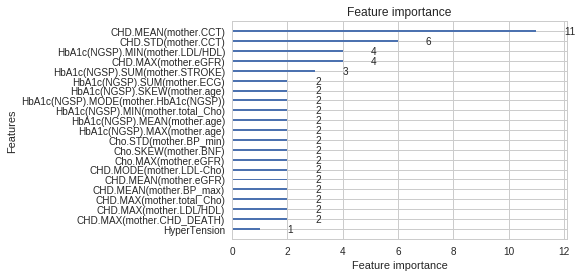

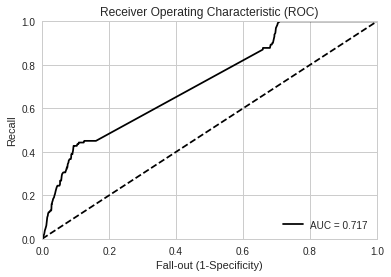

AUC score: 0.716627684821069


In [0]:
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

#Print accuracy
acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_lgbm_prob)

roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'black', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)

<Figure size 432x288 with 0 Axes>

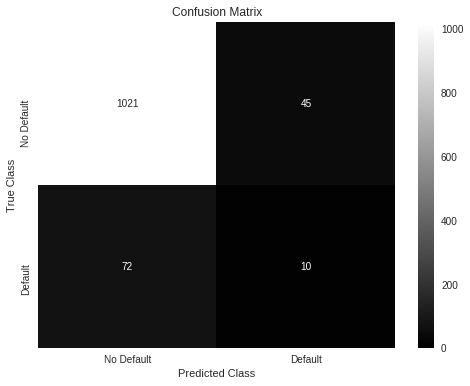

In [0]:
plt.figure()
cm = confusion_matrix(y_test, predictions_lgbm_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="gray", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [0]:
preds = np.round(lgbm.predict(X_test))

print('Accuracy score = \t {}'.format(accuracy_score(y_test, preds)))
print('Precision score = \t {}'.format(precision_score(y_test, preds)))
print('Recall score =   \t {}'.format(recall_score(y_test, preds)))
print('F1 score =      \t {}'.format(f1_score(y_test, preds)))

Accuracy score = 	 0.8867595818815331
Precision score = 	 0.14705882352941177
Recall score =   	 0.12195121951219512
F1 score =      	 0.1333333333333333
